In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cData = pd.read_csv('auto-mpg.csv')
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
cData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
cData['origin'] = cData['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


In [ ]:
cData = pd.get_dummies(cData, columns=['origin'])
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0


In [ ]:
cData = cData.drop('car name', axis = 1)
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [ ]:
cData.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [ ]:
horsePower = pd.DataFrame(cData.horsepower.str.isdigit())
horsePower.head()

,horsepower
0,True
1,True
2,True
3,True
4,True


In [ ]:
cData[horsePower['horsepower']==False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [ ]:
cData['horsepower'] = cData['horsepower'].replace("?", np.nan)
cData[horsePower['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [ ]:
medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller, axis = 0)
cData[horsePower['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,93.5,2046,19.0,71,1,0,0
126,21.0,6,200.0,93.5,2875,17.0,74,1,0,0
330,40.9,4,85.0,93.5,1835,17.3,80,0,0,1
336,23.6,4,140.0,93.5,2905,14.3,80,1,0,0
354,34.5,4,100.0,93.5,2320,15.8,81,0,0,1
374,23.0,4,151.0,93.5,3035,20.5,82,1,0,0


In [ ]:
cData['horsepower']=cData['horsepower'].astype('float64')
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [ ]:
car_data = cData.iloc[:,:7]
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


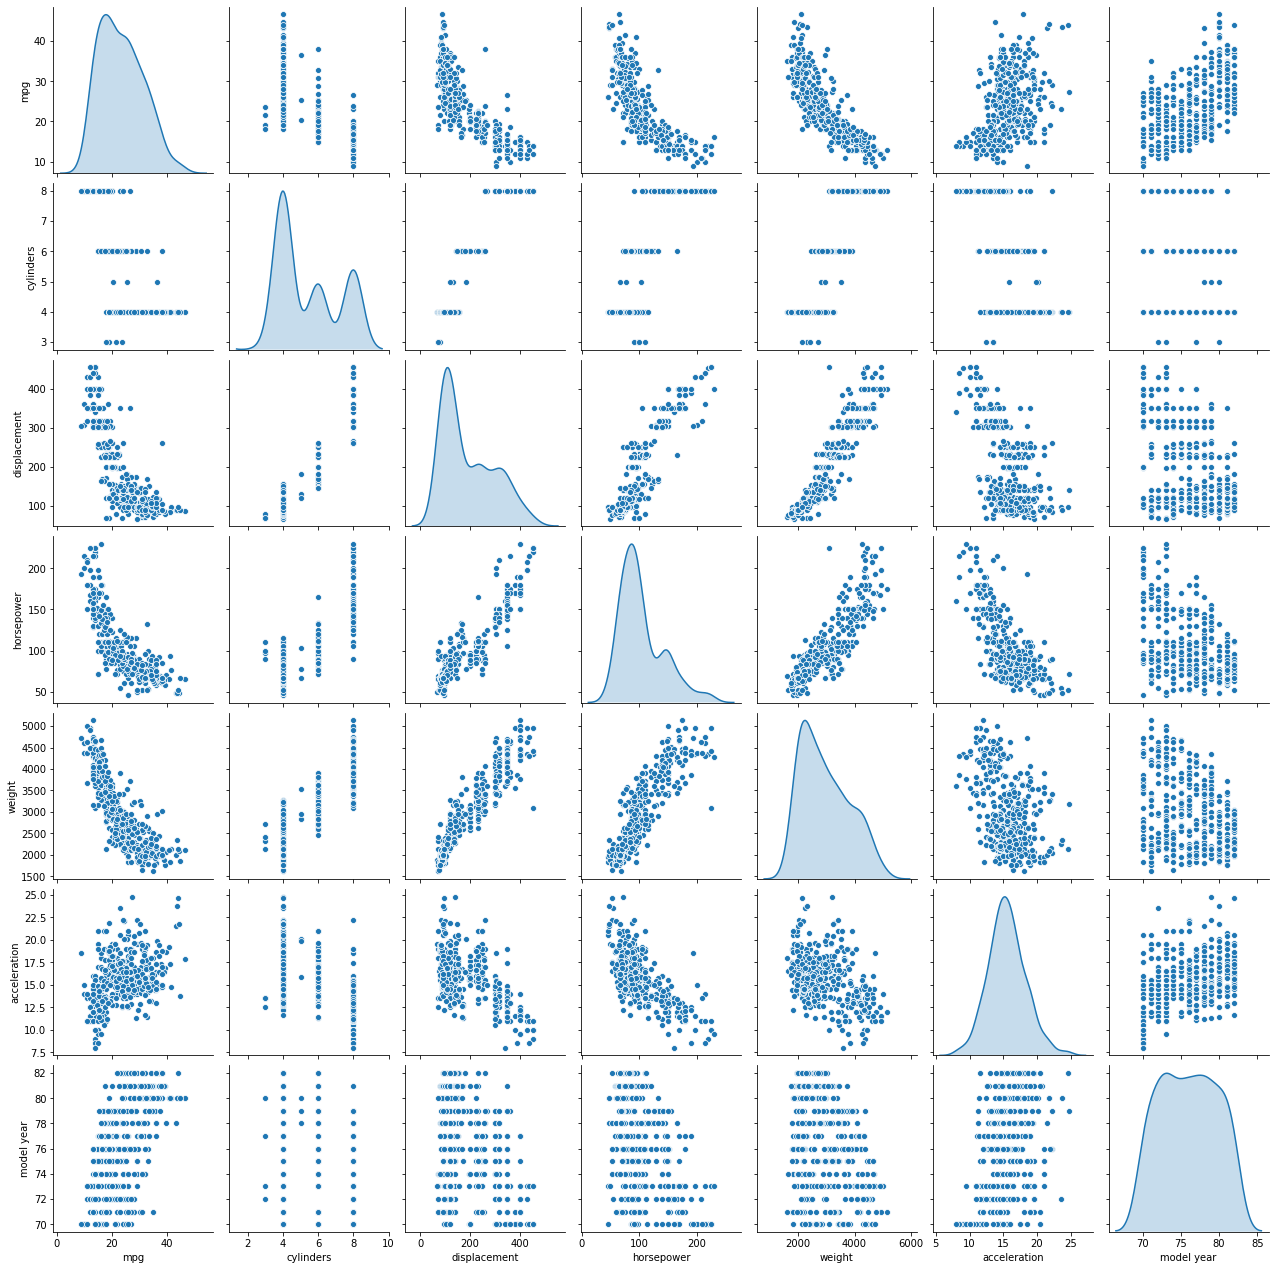

In [ ]:
sns.pairplot(car_data, diag_kind='kde')
plt.show()

In [ ]:
x = cData.drop(['origin_europe','mpg'], axis = 1)
y = cData[['mpg']]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 1)

In [ ]:
regressionModel = LinearRegression()
regressionModel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
for index, column_name in enumerate(x_train.columns):
  print("The coefficient for {} is {}".format(column_name, regressionModel.coef_[0][index]))

The coefficient for cylinders is -0.39480796616482383
The coefficient for displacement is 0.028945510765487188
The coefficient for horsepower is -0.02175220772354677
The coefficient for weight is -0.007352032065147351
The coefficient for acceleration is 0.061919366007618756
The coefficient for model year is 0.836933891764499
The coefficient for origin_america is -3.001283000918514
The coefficient for origin_asia is -0.6060179643247368


In [ ]:
intercept = regressionModel.intercept_[0]
print("The intercept of our model is {}".format(intercept))

The intercept of our model is -18.283451116372053


In [ ]:
score = regressionModel.score(x_train,y_train)
print("The Regression score or R^2 of our model is {}".format(score))

The Regression score or R^2 of our model is 0.814102550161056


In [ ]:
test_score = regressionModel.score(x_test,y_test)
print("The R^2 of our testing data is {}".format(test_score))

The R^2 of our testing data is 0.8433135132808833


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree = 2, interaction_only = True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2, y_train)

print("The score of testing data is {}".format(poly_clf.score(x_train2, y_train)))

The score of testing data is 0.901597529386062


In [ ]:
print("The score of testing data is {}".format(poly_clf.score(x_test2, y_test)))

The score of testing data is 0.8647441062163364
